The \textbf{ Rosenbrock function} is defined as:
<center>$f(x) = 10\,(x_2 - x_1^2)^2 + (1-x_1)^2$</center>
This function is minimized at the point $x = [1,1]^\top$


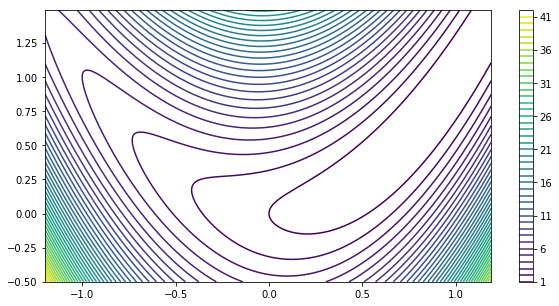

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
# Rosenbrock function
def rosen(x):
    y=10*(x[1]-x[0]**2)**2+(1-x[0])**2 # minimizer is at x=[1,1]
    return y
rcParams['figure.figsize'] = 10, 5
x0 = np.arange(-1.2, 1.2, 0.01) #https://www.python-course.eu/matplotlib_contour_plot.php
x1 = np.arange(-0.5, 1.5, 0.01) #https://www.cc.gatech.edu/classes/AY2015/cs2316_fall/codesamples/rosenbrock_demo.py
x0,x1 = np.meshgrid(x0, x1) #https://matplotlib.org/examples/pylab_examples/contour_demo.html
x=[x0,x1]
def plot_func(f,x):
    z=f(x)
    plt.contour(x[0],x[1],z,50)
    plt.colorbar()
    plt.show()
plot_func(rosen,x)

### Backtracking line search

In [4]:
def rosen_grad(x):
    g = np.zeros(2)
    g[0] = -40*x[0]*(x[1] - x[0]**2) + 2*x[0] - 2
    g[1] = 20*x[1] - 20*x[0]**2
    return g
from numpy import linalg as la
def backtrack_linesearch(f, gk, pk, xk, alpha = 0.1, beta = 0.5):
    t = 1
    while ( f(xk + t*pk) >= f(xk) + alpha * t * gk @ pk ):
        t *= beta
    return t
def steepest_descent_bt(f, grad, x0, tol = 1e-5):
    x = x0
    history = np.array( [x0] )
    while ( la.norm(grad(x)) > tol ):
        p = -grad(x)
        t = backtrack_linesearch(f, grad(x), p, x)
        x += t * p
        history = np.vstack( (history, x) )
    return x, history


### Performance assessment:

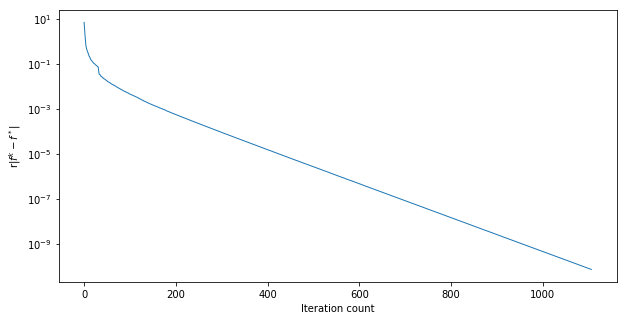

In [5]:
x_0 = np.array([-1.2, 1.0])
xstart, hist = steepest_descent_bt(rosen, rosen_grad, x_0)
nsteps = hist.shape[0]
fhist = np.zeros(nsteps)
for i in range(nsteps):
    fhist[i] = rosen(hist[i,:])
plt.figure()
plt.autoscale(enable=True, axis=x, tight=True)
plt.semilogy(np.arange(0, nsteps), fhist, linewidth=1)
plt.xlabel('Iteration count')
plt.ylabel('r$|f^k - f^*|$')
plt.show()


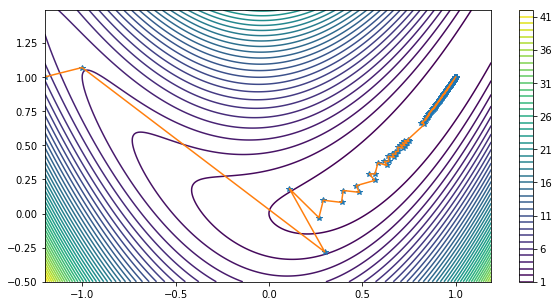

In [6]:
x_0 = np.array([-1.2, 1.0])
x1_val = [t[0] for t in hist]
x2_val = [t[1] for t in hist]
plt.plot(x1_val,x2_val,'*')
plt.plot(x1_val,x2_val)
plt.autoscale(enable=True, axis=x, tight=True)
plot_func(rosen,x)

#### Note:
Steepest descent convergence is linear in the number of iterations.